In [1]:
# import the necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
# load the dataset 
udemy = pd.read_csv(r'C:\Users\OJO Timilehin\Desktop\dataset\udemy_output_All_Business.csv')

In [7]:
# top 5 observations 
udemy.tail(10)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
9437,1380170,MBA ASAP Guide to Startups and Entrepreneurship,/course/startups-m/,True,116,4.66667,4.63019,4.63019,3,False,46,0,2017-10-04T20:38:28Z,2017-10-11T23:35:38Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
9438,1024882,Closing a UK Limited Company,/course/closing-a-uk-limited-company/,True,14,3.66667,4.67611,4.67611,3,False,10,0,2016-11-27T22:37:01Z,2018-11-30T18:00:29Z,455.0,INR,₹455,1920.0,INR,"₹1,920"
9439,1399024,Intelligent Selling Masterclass,/course/intelligent-selling-masterclass/,True,275,5.00000,5.00000,5.00000,3,False,7,0,2017-10-18T08:41:48Z,2017-10-18T22:31:56Z,455.0,INR,₹455,1600.0,INR,"₹1,600"
9440,2432444,Improving Employee Performance,/course/improving-employee-performance/,True,13,4.50000,4.56275,4.56275,3,False,17,0,2019-06-27T06:41:36Z,2019-07-27T18:52:30Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
9441,2378286,Ten Steps to Sales Success,/course/ten-steps-to-sales-success/,True,19,4.33333,4.49935,4.49935,3,False,12,0,2019-05-21T19:16:58Z,2019-08-06T14:01:04Z,455.0,INR,₹455,1600.0,INR,"₹1,600"
9442,1934910,Simple Value Investing Guide With Proven Methods,/course/simple-value-investing-guide-with-prov...,True,1129,3.50000,3.43520,3.43520,3,False,35,0,2018-09-27T04:37:00Z,2018-10-31T22:58:12Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
9443,2057175,Effectively Optimizing Your Recruitment Process,/course/optimizing-your-recruitment-process/,True,9,2.16667,2.16014,2.16014,3,False,26,0,2018-11-29T13:39:30Z,2018-12-04T02:13:17Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
9444,1964000,Leadership Development:Ready To Use Tools to l...,/course/leadership-development-how-to-lead-you...,True,1017,4.16667,3.88844,3.88844,3,False,5,0,2018-10-13T10:03:33Z,2018-10-27T21:50:36Z,455.0,INR,₹455,6400.0,INR,"₹6,400"
9445,2769588,Business Efficiency: How To Increase Workplace...,/course/business-efficiency-how-to-increase-wo...,True,1716,3.66667,3.52632,3.52632,3,False,7,0,2020-01-20T18:10:33Z,2020-01-21T16:25:32Z,455.0,INR,₹455,6400.0,INR,"₹6,400"
9446,2801192,How to enter the US market?,/course/how-to-enter-the-us-market/,True,14,5.00000,5.00000,5.00000,3,False,5,0,2020-02-07T06:16:29Z,2020-02-11T22:10:35Z,455.0,INR,₹455,6400.0,INR,"₹6,400"


In [4]:
# data shape 
udemy.shape

(9447, 20)

In [8]:
# null values 
udemy.isnull().sum()

id                                0
title                             0
url                               0
is_paid                           0
num_subscribers                   0
avg_rating                        0
avg_rating_recent                 0
rating                            0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
discount_price__amount          510
discount_price__currency        510
discount_price__price_string    510
price_detail__amount              0
price_detail__currency            0
price_detail__price_string        0
dtype: int64

In [15]:
for feature in udemy.columns: 
    print(feature, ': ', udemy[feature].dtype, ',', 
          udemy[feature].nunique(), 'unique')

id :  int64 , 9447 unique
title :  object , 9424 unique
url :  object , 9447 unique
is_paid :  bool , 1 unique
num_subscribers :  int64 , 4319 unique
avg_rating :  float64 , 1634 unique
avg_rating_recent :  float64 , 9019 unique
rating :  float64 , 9019 unique
num_reviews :  int64 , 1176 unique
is_wishlisted :  bool , 1 unique
num_published_lectures :  int64 , 278 unique
num_published_practice_tests :  int64 , 7 unique
created :  object , 9446 unique
published_time :  object , 9446 unique
discount_price__amount :  float64 , 48 unique
discount_price__currency :  object , 1 unique
discount_price__price_string :  object , 48 unique
price_detail__amount :  float64 , 36 unique
price_detail__currency :  object , 1 unique
price_detail__price_string :  object , 36 unique


In [18]:
# drop features that are not needed 
udemy.drop(['id', 'title', 'url', 'discount_price__currency', 'discount_price__price_string', 
             'price_detail__currency', 'price_detail__price_string'], axis = 'columns', inplace = True)

In [19]:
udemy.head()

,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0
1,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0
2,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,8640.0
3,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,8640.0
4,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,8640.0


In [24]:
# change 'created', 'published_time' to datetime object 
c_datetime = ['created', 'published_time']
for feature in udemy[c_datetime]: 
    udemy[feature] = pd.to_datetime(udemy[feature])

In [27]:
udemy.dtypes

is_paid                                        bool
num_subscribers                               int64
avg_rating                                  float64
avg_rating_recent                           float64
rating                                      float64
num_reviews                                   int64
is_wishlisted                                  bool
num_published_lectures                        int64
num_published_practice_tests                  int64
created                         datetime64[ns, UTC]
published_time                  datetime64[ns, UTC]
discount_price__amount                      float64
price_detail__amount                        float64
dtype: object

### Feature Creation

In [36]:
# feature creation
for feature in udemy[c_datetime]: 
    udemy[feature +'Year'] = udemy[feature].dt.year 
    udemy[feature +'Month'] = udemy[feature].dt.month 
    udemy[feature +'Day'] = udemy[feature].dt.day

In [42]:
pd.set_option('display.max_columns', None)
udemy.head()

,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,createdYear,createdMonth,createdDay,published_timeYear,published_timeMonth,published_timeDay
0,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455.0,8640.0,2016,2,14,2016,4,6
1,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455.0,8640.0,2016,8,22,2016,8,23
2,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14+00:00,455.0,8640.0,2017,9,26,2017,11,14
3,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,455.0,8640.0,2015,10,23,2016,1,21
4,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,455.0,8640.0,2015,10,12,2016,1,11


In [45]:
udemy.drop(c_datetime, axis = 1, inplace = True)

In [83]:
udemy['rating_diff'] = udemy['avg_rating_recent'] - udemy['avg_rating']

In [84]:
udemy.drop('rating', axis = 1, inplace = True)

In [92]:
udemy.dtypes

is_paid                            bool
num_subscribers                   int64
avg_rating                      float64
avg_rating_recent               float64
num_reviews                       int64
is_wishlisted                      bool
num_published_lectures            int64
num_published_practice_tests      int64
discount_price__amount          float64
price_detail__amount            float64
createdYear                       int64
createdMonth                      int64
createdDay                        int64
published_timeYear                int64
published_timeMonth               int64
published_timeDay                 int64
rating_diff                     float64
dtype: object

### Exploratory Data Analysis

In [93]:
### Numerical variable 
num_var =[feature for feature in udemy.columns if udemy[feature].dtype in ['int64', 'float64']] 
num_var

['num_subscribers',
 'avg_rating',
 'avg_rating_recent',
 'num_reviews',
 'num_published_lectures',
 'num_published_practice_tests',
 'discount_price__amount',
 'price_detail__amount',
 'createdYear',
 'createdMonth',
 'createdDay',
 'published_timeYear',
 'published_timeMonth',
 'published_timeDay',
 'rating_diff']

### Histogram distribution

<Figure size 576x360 with 0 Axes>

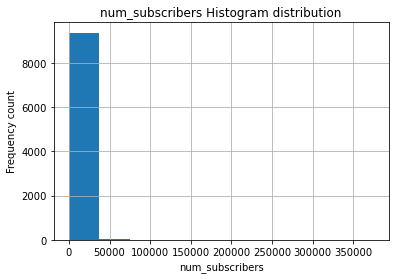

<Figure size 576x360 with 0 Axes>

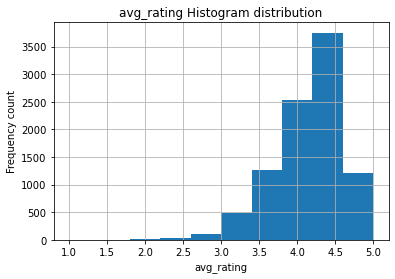

<Figure size 576x360 with 0 Axes>

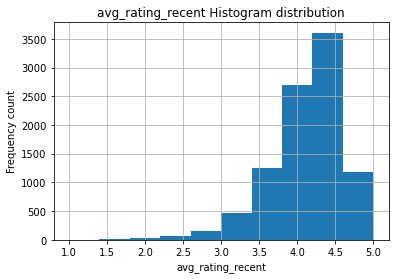

<Figure size 576x360 with 0 Axes>

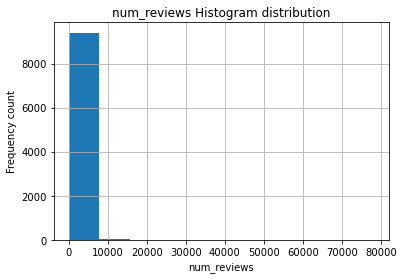

<Figure size 576x360 with 0 Axes>

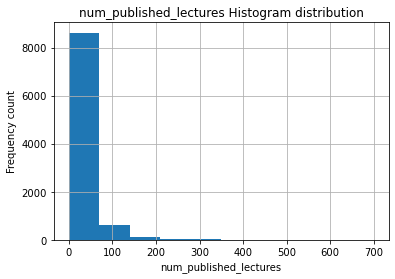

<Figure size 576x360 with 0 Axes>

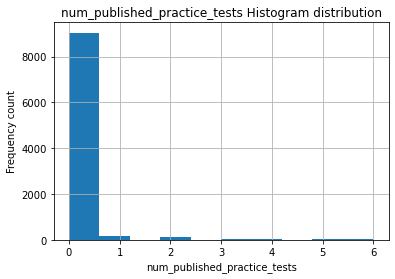

<Figure size 576x360 with 0 Axes>

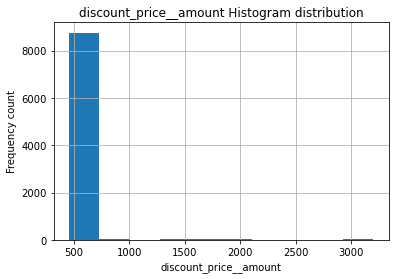

<Figure size 576x360 with 0 Axes>

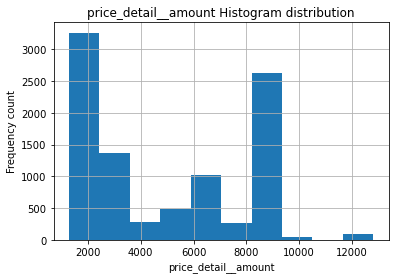

<Figure size 576x360 with 0 Axes>

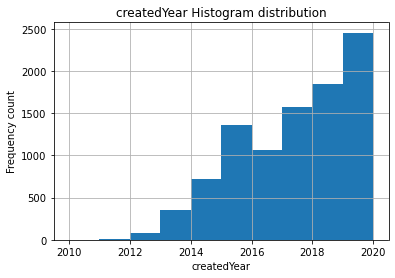

<Figure size 576x360 with 0 Axes>

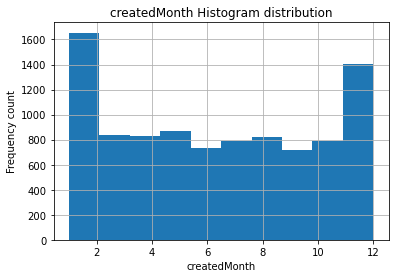

<Figure size 576x360 with 0 Axes>

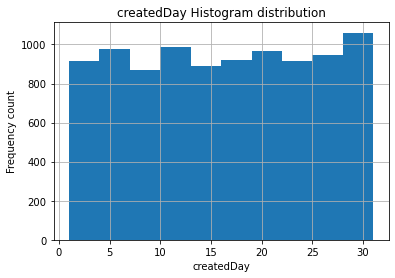

<Figure size 576x360 with 0 Axes>

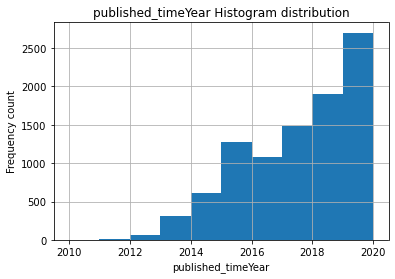

<Figure size 576x360 with 0 Axes>

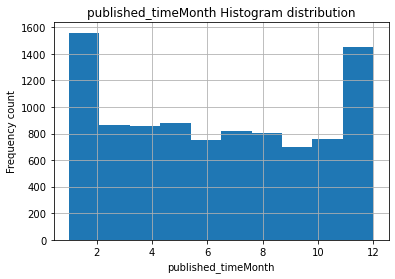

<Figure size 576x360 with 0 Axes>

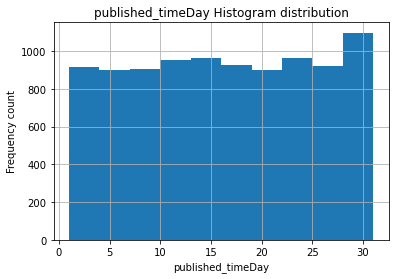

<Figure size 576x360 with 0 Axes>

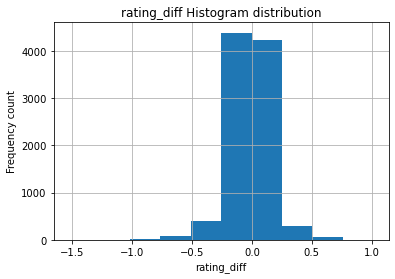

In [94]:
### Histogram distribution 
for feature in num_var: 
    data = udemy.copy() 
    plt.figure(figsize=(8, 5))
    data.hist(feature) 
    plt.xlabel(feature) 
    plt.ylabel('Frequency count')
    plt.title(feature+ ' Histogram distribution')
    plt.show()

### Scatter plot : Numerical variable relationship with the target variable

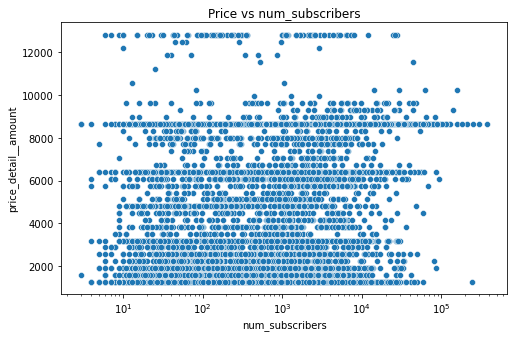

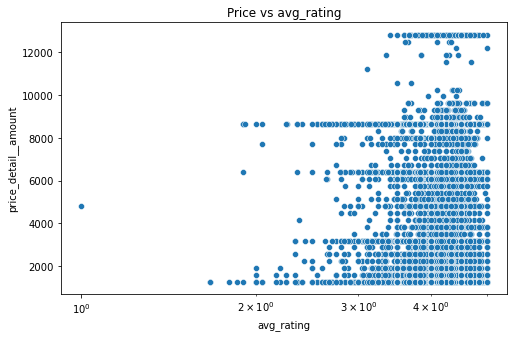

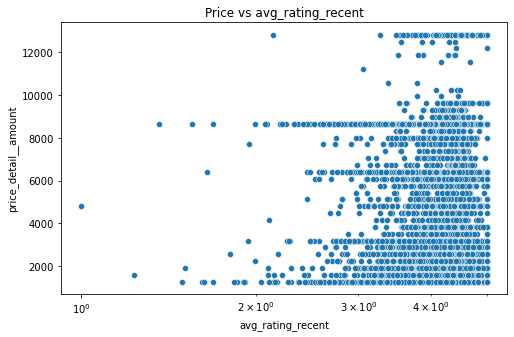

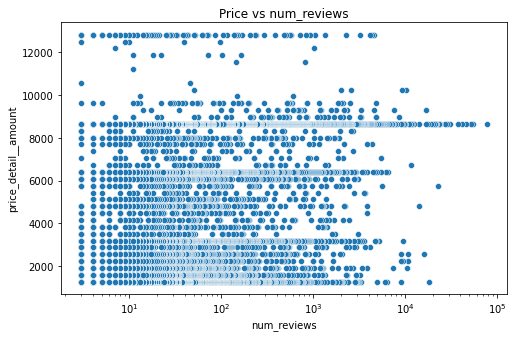

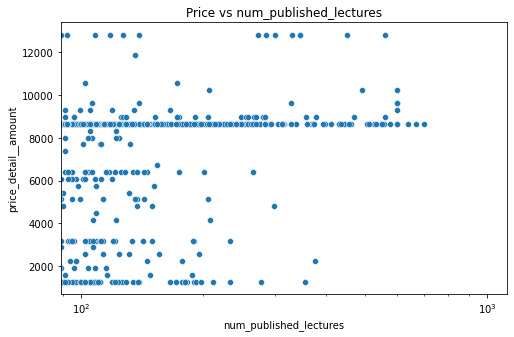

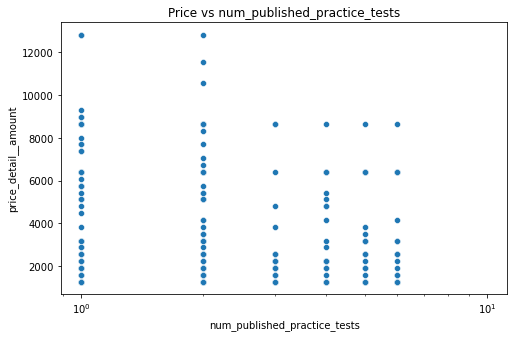

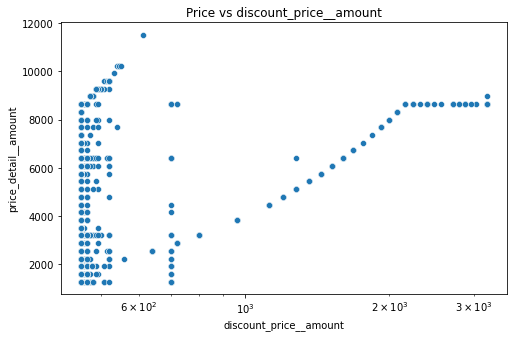

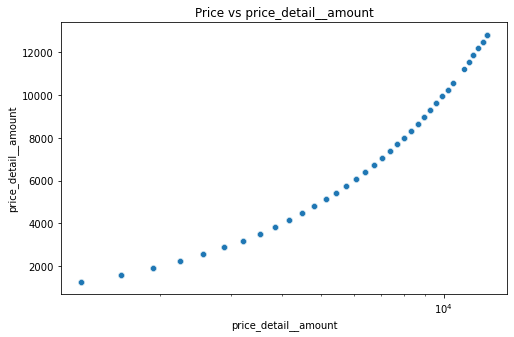

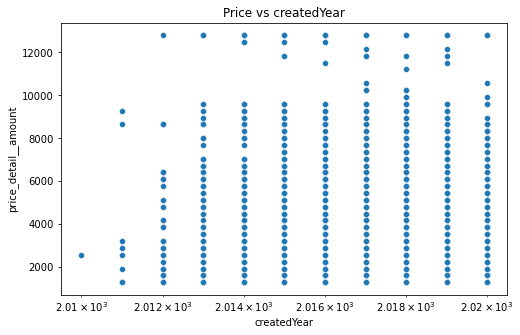

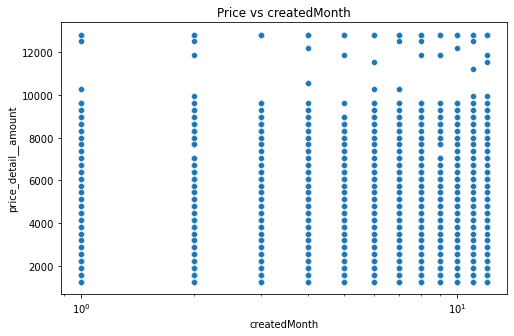

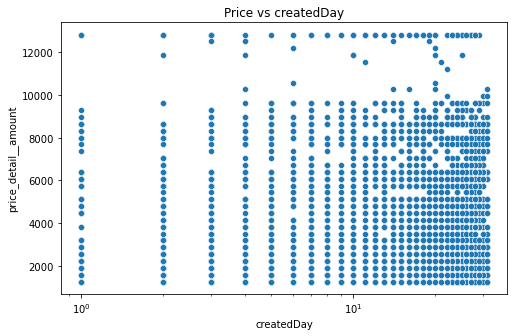

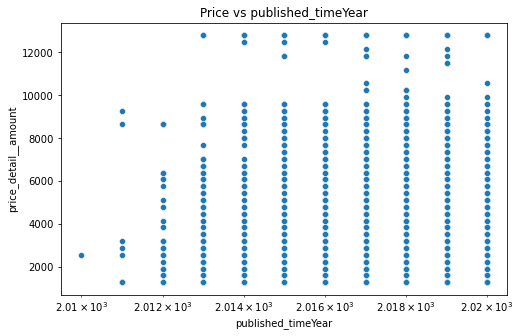

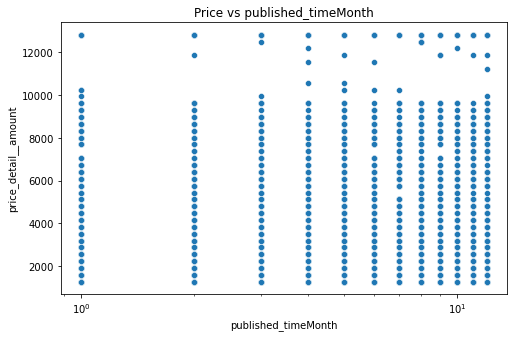

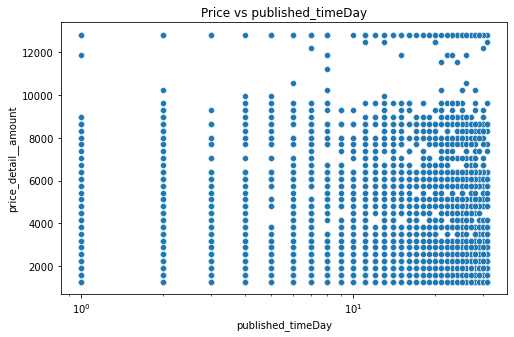

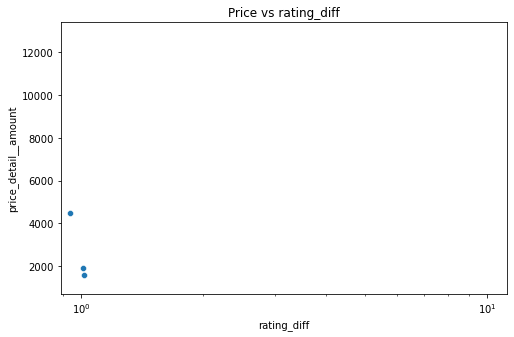

In [95]:
# scatter plot 
for feature in num_var:
    plt.figure(figsize=(8, 5))
    data = udemy.copy()
    sns.scatterplot(x= feature, y=data['price_detail__amount'], data=data)
    plt.title('Price vs ' + feature) 
    plt.xscale('log')
    plt.show()

### Outlier detection

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


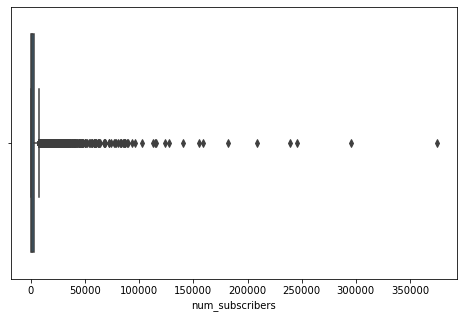

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


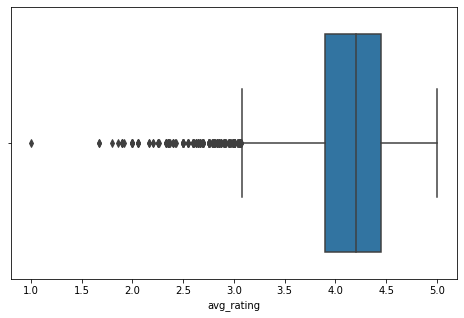

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


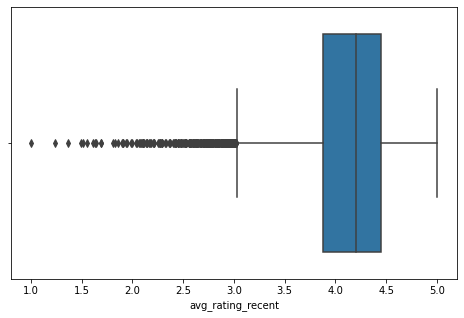

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


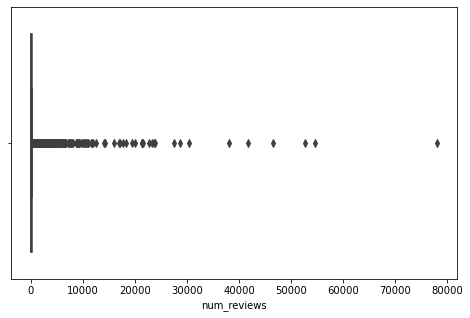

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


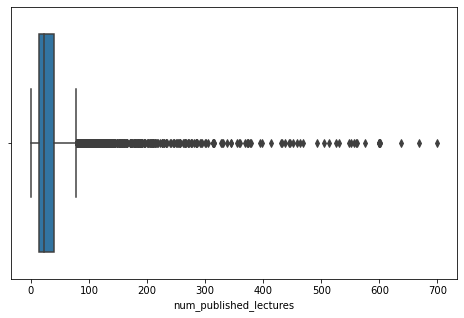

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


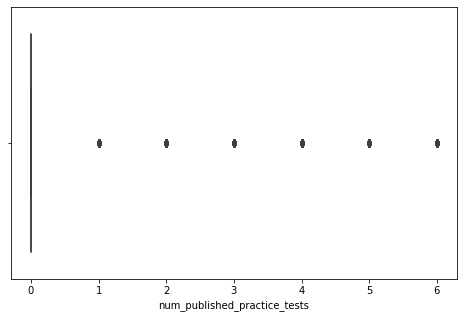

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


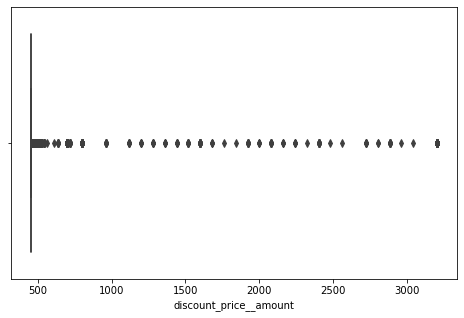

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


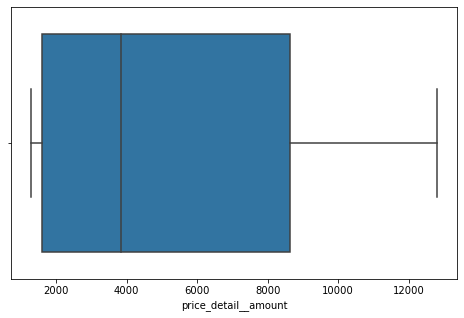

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


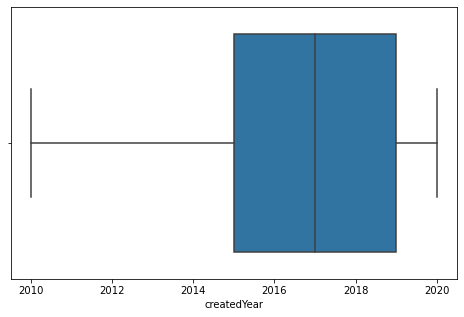

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


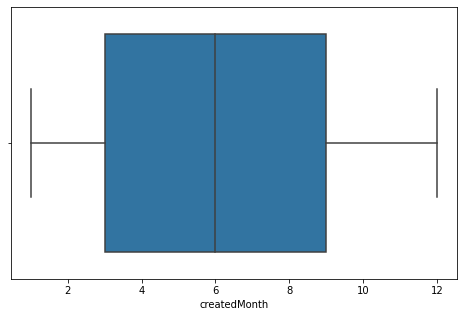

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


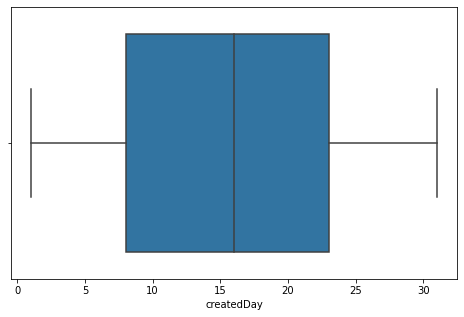

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


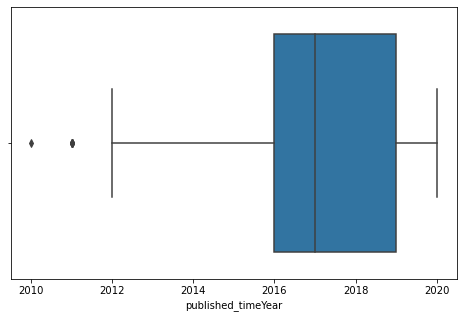

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


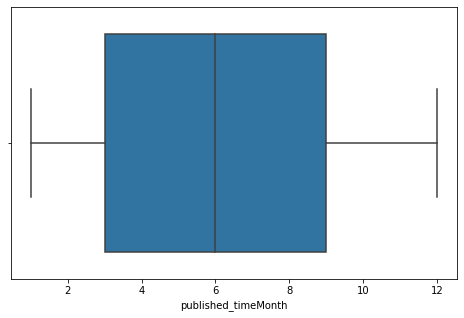

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


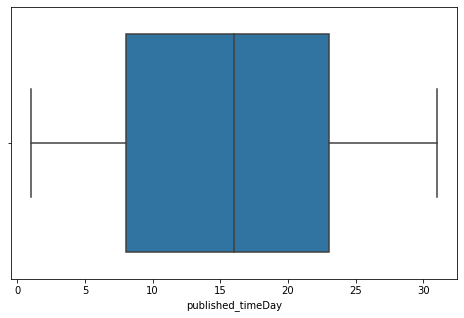

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


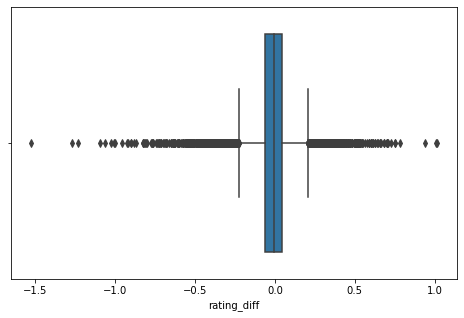

In [105]:
for feature in num_var: 
    data = udemy.copy()
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[feature])
    plt.show()

### Correllation

In [68]:
udemy.drop(['is_paid', 'is_wishlisted'], axis=1).corr()

,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,createdYear,createdMonth,createdDay,published_timeYear,published_timeMonth,published_timeDay
num_subscribers,1.000000,0.053321,0.056718,0.056718,0.790876,0.226095,-0.027532,-0.020028,0.145518,-0.056200,0.007048,0.007772,-0.058279,-0.004574,-0.005223
avg_rating,0.053321,1.000000,0.945983,0.945983,0.095039,0.110121,-0.059896,0.064538,0.118403,0.054762,-0.014027,-0.006970,0.059054,0.006812,0.008582
avg_rating_recent,0.056718,0.945983,1.000000,1.000000,0.093322,0.101690,-0.062944,0.065066,0.107236,0.059880,-0.015319,-0.011987,0.063690,0.009030,0.008526
rating,0.056718,0.945983,1.000000,1.000000,0.093322,0.101690,-0.062944,0.065066,0.107236,0.059880,-0.015319,-0.011987,0.063690,0.009030,0.008526
num_reviews,0.790876,0.095039,0.093322,0.093322,1.000000,0.188272,-0.004241,-0.001602,0.102589,-0.065307,0.019553,0.018328,-0.063328,0.008636,0.000252
num_published_lectures,0.226095,0.110121,0.101690,0.101690,0.188272,1.000000,-0.059669,0.027290,0.270573,-0.002844,0.001362,-0.008772,0.000366,0.006096,0.005431
num_published_practice_tests,-0.027532,-0.059896,-0.062944,-0.062944,-0.004241,-0.059669,1.000000,0.040762,-0.076878,0.146477,-0.054052,-0.006441,0.141525,-0.046792,0.004235
discount_price__amount,-0.020028,0.064538,0.065066,0.065066,-0.001602,0.027290,0.040762,1.000000,0.123501,0.059873,-0.003664,-0.003082,0.062594,-0.005284,0.013362
price_detail__amount,0.145518,0.118403,0.107236,0.107236,0.102589,0.270573,-0.076878,0.123501,1.000000,0.089124,0.033258,-0.020921,0.095538,0.028381,-0.000436
createdYear,-0.056200,0.054762,0.059880,0.059880,-0.065307,-0.002844,0.146477,0.059873,0.089124,1.000000,-0.197579,0.002795,0.975434,-0.121123,0.019762


<AxesSubplot:>

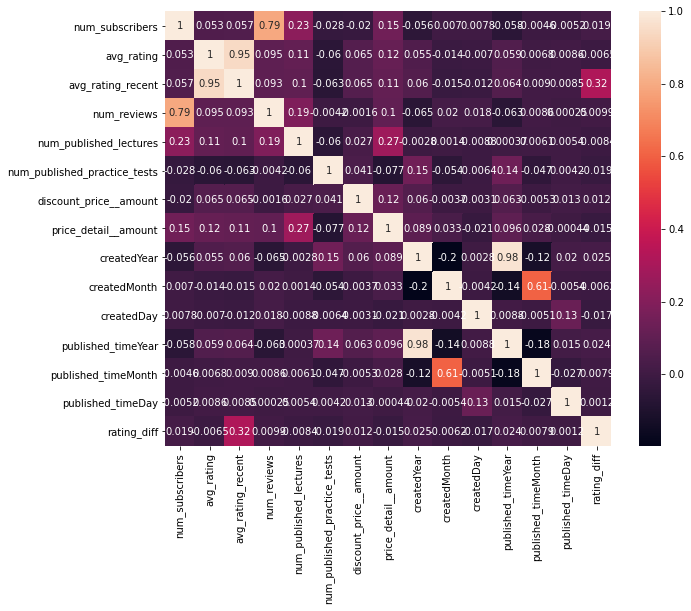

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(udemy.drop(['is_paid', 'is_wishlisted'], axis=1).corr(), annot = True)

In [85]:
udemy.head()

,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,createdYear,createdMonth,createdDay,published_timeYear,published_timeMonth,published_timeDay,rating_diff
0,True,295509,4.66019,4.67874,78006,False,84,0,455.0,8640.0,2016,2,14,2016,4,6,0.01855
1,True,209070,4.58956,4.60015,54581,False,78,0,455.0,8640.0,2016,8,22,2016,8,23,0.01059
2,True,155282,4.59491,4.59326,52653,False,292,2,455.0,8640.0,2017,9,26,2017,11,14,-0.00165
3,True,245860,4.54407,4.53772,46447,False,338,0,455.0,8640.0,2015,10,23,2016,1,21,-0.00635
4,True,374836,4.47080,4.47173,41630,False,83,0,455.0,8640.0,2015,10,12,2016,1,11,0.00093


In [91]:
udemy.isnull().sum()

is_paid                           0
num_subscribers                   0
avg_rating                        0
avg_rating_recent                 0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
discount_price__amount          510
price_detail__amount              0
createdYear                       0
createdMonth                      0
createdDay                        0
published_timeYear                0
published_timeMonth               0
published_timeDay                 0
rating_diff                       0
dtype: int64

In [106]:
### fill na 
udemy['discount_price__amount'].fillna(0, inplace=True)

In [107]:
udemy.isnull().sum()

is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
discount_price__amount          0
price_detail__amount            0
createdYear                     0
createdMonth                    0
createdDay                      0
published_timeYear              0
published_timeMonth             0
published_timeDay               0
rating_diff                     0
dtype: int64

### Feature Engineering

In [117]:
udemy['is_paid'].replace({True:1}, inplace = True) 
udemy['is_wishlisted'].replace({False:0}, inplace=True)

In [118]:
udemy.head()

,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,createdYear,createdMonth,createdDay,published_timeYear,published_timeMonth,published_timeDay,rating_diff
0,1,295509,4.66019,4.67874,78006,0,84,0,455.0,8640.0,2016,2,14,2016,4,6,0.01855
1,1,209070,4.58956,4.60015,54581,0,78,0,455.0,8640.0,2016,8,22,2016,8,23,0.01059
2,1,155282,4.59491,4.59326,52653,0,292,2,455.0,8640.0,2017,9,26,2017,11,14,-0.00165
3,1,245860,4.54407,4.53772,46447,0,338,0,455.0,8640.0,2015,10,23,2016,1,21,-0.00635
4,1,374836,4.47080,4.47173,41630,0,83,0,455.0,8640.0,2015,10,12,2016,1,11,0.00093


### Train test split

In [124]:
# dependent and independent variable 
X = udemy.drop('price_detail__amount', axis=1)
y = udemy['price_detail__amount']

In [137]:
# split the dataset 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42) 

print('X_train shape: ', X_train.shape)
print('X_test_shape: ', X_test.shape)
print('y_train_shape: ', y_train.shape)
print('y_test_shape: ', y_test.shape)

X_train shape:  (7368, 16)
X_test_shape:  (2079, 16)
y_train_shape:  (7368,)
y_test_shape:  (2079,)


### Feature Selection 


### Mutual info regression

In [142]:
from sklearn.feature_selection import mutual_info_regression 

mi_reg = mutual_info_regression(X_train, y_train) 

# convert to series 
mi_reg = pd.Series(mi_reg) 

# add column names
mi_reg.index = X_train.columns 

mi_reg.sort_values(ascending=False)

discount_price__amount          0.173095
num_published_lectures          0.085273
num_subscribers                 0.046136
createdYear                     0.041018
num_reviews                     0.038302
published_timeYear              0.027637
avg_rating                      0.023765
rating_diff                     0.021170
avg_rating_recent               0.020487
createdDay                      0.010477
num_published_practice_tests    0.005967
published_timeMonth             0.003482
createdMonth                    0.000408
is_paid                         0.000000
is_wishlisted                   0.000000
published_timeDay               0.000000
dtype: float64

### Using SelectKBest

In [145]:
# import SelectKBest
from sklearn.feature_selection import SelectKBest 

skb = SelectKBest(mutual_info_regression, k=10)

skb.fit(X_train, y_train)

SelectKBest(score_func=<function mutual_info_regression at 0x000001CAEAB10820>)

In [150]:
X_train.columns[skb.get_support()]

Index(['num_subscribers', 'avg_rating', 'avg_rating_recent', 'num_reviews',
       'num_published_lectures', 'discount_price__amount', 'createdYear',
       'published_timeYear', 'published_timeDay', 'rating_diff'],
      dtype='object')

In [151]:
# kept_features dataframe
kept_features = pd.DataFrame({'variable': X_train.columns, 
                             'kept':skb.get_support()})
kept_features.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
variable,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,createdYear,createdMonth,createdDay,published_timeYear,published_timeMonth,published_timeDay,rating_diff
kept,False,True,True,True,True,False,True,False,True,True,False,False,True,False,True,True


In [152]:
# New dataframe with the SelectKBest Features
X_train_new = skb.transform(X_train)
X_test_new = skb.transform(X_test)

### Standardization

In [163]:
from sklearn.preprocessing import StandardScaler 

sts = StandardScaler() 

# standardize X_train 
X_train_new = sts.fit_transform(X_train_new)

# standardize X_test 
X_test_new = sts.transform(X_test_new)

### Modelling

In [164]:
# import linear regression 
from sklearn.linear_model import LinearRegression 

li_reg = LinearRegression()

# training
li_reg.fit(X_train_new, y_train)

LinearRegression()

In [165]:
li_reg.intercept_

4832.273488849183

In [166]:
li_reg.coef_

array([ 3.88841029e+02, -8.56321906e+15,  9.06049990e+15, -9.80000000e+01,
        7.04500000e+02,  2.15117188e+02, -2.96250000e+02,  5.72437500e+02,
       -1.25039062e+01, -2.95899009e+15])

In [167]:
y_pred = li_reg.predict(X_test_new)
y_pred

array([4636.02348885, 4743.02348885, 8094.27348885, ..., 4651.02348885,
       4510.64848885, 3896.02348885])

In [168]:
pd.DataFrame({'Actual value': y_test, 'Predicted Value': y_pred})

,Actual value,Predicted Value
2818,1280.0,4636.023489
7966,4800.0,4743.023489
761,8640.0,8094.273489
1470,12800.0,7895.398489
1046,2240.0,4596.023489
...,...,...
3370,6400.0,4930.773489
8835,8640.0,4261.273489
1396,8640.0,4651.023489
3244,1280.0,4510.648489


In [169]:
li_reg.score(X_train_new, y_train)

0.09958106423714308